# Deutsch-Jozsa Algorithm

In [1]:
#initialization
import numpy as np

#importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

#import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
def dj_oracle(case, n):
    #We need to make a QuantumCircuit object to return
    #This circuit has n+1 qubits: the size of the input,
    #plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    #First, lets deal with the case in which oracle is balanced
    if case == "balanced":
        #We apply controlled-NOT gates for each qubit, usisng the
        #output qubit as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
            
    #Case in which oracle is constant
    if case == "constant":
        #First decide what the fixed output of the oracle will be
        #(either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
            
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" #To show when we display the circuit
    return oracle_gate

In [3]:
def dj_algorithm(n, case = 'random'):
    dj_circuit = QuantumCircuit(n+1, n)
    #Set up the input registor:
    for qubit in range(n):
        dj_circuit.h(qubit)
        #And set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    #Let's append the oracle gate to our circuit:
    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'
    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))
    #Finally, perform the H-gates again and measure:
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
    return dj_circuit

In [4]:
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

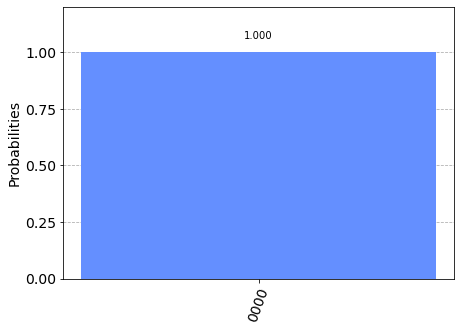

In [5]:
#use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n, 'constant')
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [6]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and 
                                not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)
%qiskit_job_watcher
dj_circuit = dj_algorithm(n)
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

least busy backend:  ibmq_manila


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

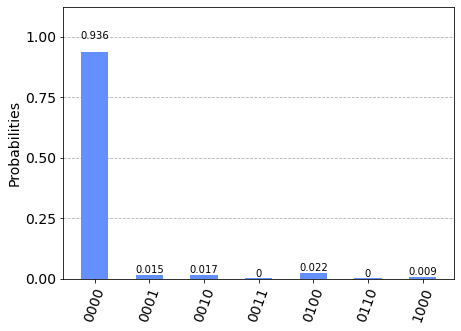

In [7]:
#Get the results of the computation
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

In [8]:
#jobs I ran before
backend = provider.get_backend('ibmq_johannesburg')
#old_job = backend.retrive_job('5ef1f78c74e2c3001237c627')
old_job = backend.retrieve_job('5ef1f78c74e2c3001237c627')
results = old_job.result()
answer = results.get_counts()
plot_histogram(answer)

QiskitBackendNotFoundError: 'No backend matches the criteria'